# Chemical-Year relation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Read all files to use

In [5]:
df_chemical_carriers = pd.read_csv("../data/ecotox_ascii_12_13_2018/chemical_carriers.txt",sep="|", dtype='unicode')
df_chemical_carriers = df_chemical_carriers[['carrier_id', 'test_id', 'cas_number', 'chem_name', 'formulation']]
print(df_chemical_carriers.shape)
df_chemical_carriers = df_chemical_carriers.drop_duplicates()
df_chemical_carriers.shape

df_chemical_formulation_codes = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/chemical_formulation_codes.txt",sep="|", dtype='unicode')
df_chemical_grade_codes = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/chemical_grade_codes.txt",sep="|", dtype='unicode')
df_effect_codes = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/effect_codes.txt",sep="|", dtype='unicode')

df_chemicals = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/chemicals.txt",sep="|", dtype='unicode')
df_chemicals = df_chemicals[['cas_number','chemical_name']]

print(df_chemicals.shape)
df_chemicals = df_chemicals.drop_duplicates()
df_chemicals.shape

df_dose_response_details = pd.read_csv("../data/ecotox_ascii_12_13_2018/dose_response_details.txt",sep="|", dtype='unicode')
df_dose_response_details = df_dose_response_details[['dose_resp_detail_id','dose_id']]

df_dose_response_details.iloc[:5]

df_dose_response_links = pd.read_csv("../data/ecotox_ascii_12_13_2018/dose_response_links.txt",sep="|", dtype='unicode')
df_dose_response_links = df_dose_response_links[['result_id', 'dose_resp_id']]

print(df_dose_response_links.shape)
df_dose_response_links = df_dose_response_links.drop_duplicates()
df_dose_response_links.shape

df_doses = pd.read_csv("../data/ecotox_ascii_12_13_2018/doses.txt",sep="|", dtype='unicode')
df_doses = df_doses[['dose_id','test_id','dose1_mean','dose2_mean','dose3_mean']]

print(df_doses.shape)
df_doses = df_doses.drop_duplicates()
df_doses.shape

df_results = pd.read_csv("../data/ecotox_ascii_12_13_2018/results.txt",sep="|", dtype='unicode')
df_results = df_results[['result_id','test_id','effect','measurement','conc1_mean','conc2_mean','conc3_mean', 'endpoint','endpoint_comments']]

print(df_results.shape)
df_results = df_results.drop_duplicates(subset=['result_id','effect'])
df_results.shape

df_species = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/species.txt",sep="|", dtype='unicode')
df_species = df_species[['species_number','common_name','kingdom','class','tax_order','family','species']]

print(df_species.shape)
df_species = df_species.drop_duplicates()
df_species.shape

df_tests = pd.read_csv("../data/ecotox_ascii_12_13_2018/tests.txt",sep="|", dtype='unicode')
df_tests = df_tests[['test_id','test_cas','organism_lifestage','species_number','organism_age_mean','organism_gender','study_duration_mean','exposure_duration_mean','test_type','num_doses_mean','application_freq_mean','halflife_mean', 'reference_number']]

print(df_tests.shape)
df_tests = df_tests.drop_duplicates(subset=['test_id', 'test_cas'])
df_tests.shape

df_references = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/references.txt",sep="|", dtype='unicode')
df_references = df_references[['reference_number', 'publication_year']]

(163246, 5)
(15844, 2)
(121581, 2)
(441971, 5)
(926108, 9)
(25225, 7)
(657735, 13)


Merge files



In [6]:
df = df_tests.merge(df_results, on=['test_id'])
df = df.merge(df_doses, on=['test_id'])
df = df.merge(df_dose_response_links, on=['result_id'])
df = df.merge(df_dose_response_details, on=['dose_id'])
df = df.merge(df_chemical_carriers, on=['test_id'])
df = df.merge(df_chemicals, on=['cas_number'])
df = df.merge(df_species, on=['species_number'])
df = df.merge(df_references, on=['reference_number'])
df.iloc[:5]

,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,num_doses_mean,...,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species,publication_year
0,13,50293,NR,5022,NR,NR,8,8,NC,1,...,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma,1978
1,13,50293,NR,5022,NR,NR,8,8,NC,1,...,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma,1978
2,13,50293,NR,5022,NR,NR,8,8,NC,1,...,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma,1978
3,13,50293,NR,5022,NR,NR,8,8,NC,1,...,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma,1978
4,13,50293,NR,5022,NR,NR,8,8,NC,1,...,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma,1978


Create final table

In [7]:
df.to_csv('../data/treated_data/table_reference_date_info.csv')

## chem_name vs publication_year – relation

In [8]:
df['chem_name'].value_counts()

Ethanol                                                                                 309832
Water                                                                                   239187
Sodium chloride (NaCl)                                                                  228767
Corn oil                                                                                196874
2-Propanone                                                                             157920
Carbamic acid, Ethyl ester                                                               97133
Cottonseed oil                                                                           67758
Peanut oil                                                                               52652
Gum arabic                                                                               47286
1,2-Propanediol                                                                          31040
Dimethylbenzene                                   

In [9]:
df['publication_year'].value_counts()

1951    289424
1973    198716
1974    169281
1988    167012
1992     92579
1970     71092
1972     56654
1995     45786
1976     41380
1969     38221
1989     36804
1986     36659
1979     35604
1985     35392
1978     29364
1990     28509
1982     23631
1984     20676
1991     20155
1996     20146
1977     17534
1954     15899
1993     14935
1987     14265
1998     14014
1999     10186
1980      8636
2000      8488
1983      7526
1964      7343
         ...  
1994      4841
1939      3718
2002      3483
1955      3236
1965      2833
1966      2691
1967      2281
1947      1346
1933       629
1958       456
1950       392
1968       305
2008       138
1945       128
1949       124
2006       120
2001       111
2009       100
2004        89
1946        68
2003        68
2005        52
1962        40
2007        28
2010        17
1937         8
1952         8
1961         3
2011         2
1944         1
Name: publication_year, Length: 65, dtype: int64

In [16]:
print('1951')
df_1951 = df.query('publication_year == "1951"')
print(df_1951['chem_name'].value_counts())
df_1951_chem = df_1951['chem_name'].value_counts()

print('\n1973\n')
df_1973 = df.query('publication_year == "1973"')
print(df_1973['chem_name'].value_counts())
df_1973_chem = df_1973['chem_name'].value_counts()

print('\n2000\n')
df_2000 = df.query('publication_year == "2000"')
print(df_2000['chem_name'].value_counts())
df_2000_chem = df_2000['chem_name'].value_counts()

print('\n1988\n')
df_1988 = df.query('publication_year == "1988"')
print(df_1988['chem_name'].value_counts())
df_1988_chem = df_1988['chem_name'].value_counts()

print('\n2008\n')
df_2008 = df.query('publication_year == "2008"')
print(df_2008['chem_name'].value_counts())
df_2008_chem = df_2008['chem_name'].value_counts()


1951
Ethanol    283154
Water        6270
Name: chem_name, dtype: int64

1973

2-Propanone                       97141
Carbamic acid, Ethyl ester        97133
Ethanol                            2705
Sodium chloride (NaCl)             1015
Corn oil                            560
Peanut oil                           78
Chloroformic acid, Hexyl ester       32
Methylene chloride                   30
1,2-Propanediol                       8
Methanol                              8
Sodium hydroxide                      6
Name: chem_name, dtype: int64

2000

Corn oil                                                    5504
Acetonitrile                                                1451
Water                                                        846
Ethanol                                                      436
Cellulose, Methyl ether                                      151
Hexane                                                        25
Methanol                                               

Ethanol

In [38]:
year = ['1951', '1973', '1988', '2000', '2008']

ethanol_use = [df_1951_chem['Ethanol'], df_1973_chem['Ethanol'], df_1988_chem['Ethanol'], df_2000_chem['Ethanol'], df_2008_chem['Ethanol']]
print(ethanol_use)
total_use = [df_1951_chem.sum(), df_1973_chem.sum(), df_1988_chem.sum(), df_2000_chem.sum(), df_2008_chem.sum()]
print(total_use)

norm_use = [ethanol_use[0]/total_use[0], ethanol_use[1]/total_use[1], ethanol_use[2]/total_use[2], ethanol_use[3]/total_use[3], ethanol_use[4]/total_use[4]]
norm_use

[283154, 2705, 164, 436, 7]
[289424, 198716, 167012, 8488, 138]


[0.9783362817181712,
 0.013612391553775237,
 0.0009819653677580055,
 0.05136663524976438,
 0.050724637681159424]

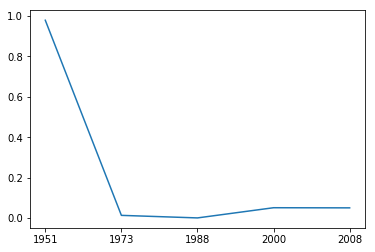

In [41]:
plt.plot(year, norm_use)
plt.show()

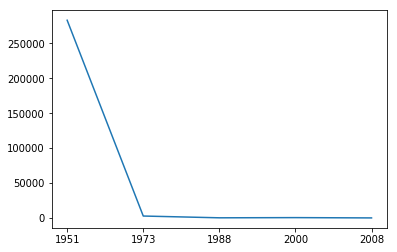

In [42]:
plt.plot(year, ethanol_use)
plt.show()

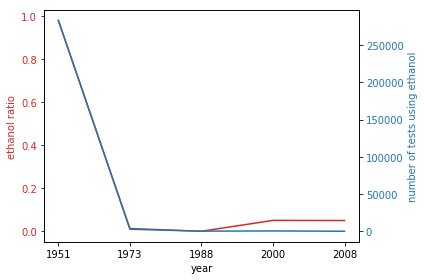

In [56]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('ethanol ratio', color=color)
ax1.plot(year, norm_use, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# plt.gca().invert_yaxis()
color = 'tab:blue'
ax2.set_ylabel('number of tests using ethanol', color=color)  # we already handled the x-label with ax1
ax2.plot(year, ethanol_use, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()